# Advanced Classification

In this notebook, we will cover:

* Decision Tree Classifier
* Random Forest Classifier
* AdaBoost
* Hyperparameter Tuning by GridSearchCV
* Tuning by Randomize Search
* XGBoost

**Importing all necessary packages**

In [1]:
#!pip install pydotplus

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [3]:
#Load Data 'titanic_clean.csv'
data = pd.read_csv('titanic_clean.csv')
df = data.copy()
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,GrpSize,FareCat,AgeCat
0,1,0,3,male,1,0,S,Mr,couple,0-10,16-32
1,2,1,1,female,1,0,C,Mrs,couple,70-100,32-48
2,3,1,3,female,0,0,S,Miss,solo,0-10,16-32
3,4,1,1,female,1,0,S,Mrs,couple,40-70,32-48
4,138,0,1,male,1,0,S,Mr,couple,40-70,32-48


In [4]:
#Do One Hot encoding for categorical varaibles and store in df
df_OneHot=pd.get_dummies(df,columns=['Pclass','Sex','Embarked','Title','GrpSize','FareCat','AgeCat'])
df_OneHot.head()

,PassengerId,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,...,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,FareCat_Oct-25,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
0,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,2,1,1,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
2,3,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,1,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,138,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [5]:
#Copy into df
df=df_OneHot.copy()

In [6]:
#Create dependent and independent variables
X = df.drop(['PassengerId', 'Survived'], axis= 1)
Y = df['Survived']

**Split the data into training and testing set and set the random state to 100**

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.3, random_state= 100, shuffle= True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(623, 30) (623,)
(268, 30) (268,)


## Defining Decision Tree classifier

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
clf_dt = DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=100)

In [11]:
clf_dt.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=3, random_state=100)

In [12]:
dt_pred = clf_dt.predict(xtest)
dt_pred_prb = clf_dt.predict_proba(xtest)[:, 1]

## Accuracy for Decision Tree

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
accuracy_dt = accuracy_score(ytest,dt_pred)
print("Accuracy: {}".format(accuracy_dt))

Accuracy: 0.8507462686567164


### Precision for Decision Tree

In [15]:
from sklearn.metrics import precision_score

In [17]:
precision_dt = precision_score(ytest, dt_pred)
print("Precision: {}".format(precision_dt))

Precision: 0.7857142857142857


### Recall for Decision Tree

In [18]:
from sklearn.metrics import recall_score

In [19]:
recall_dt = recall_score(ytest,dt_pred)
print("Recall: {}".format(recall_dt))

Recall: 0.8020833333333334


###  F1 Score for Decision Tree

In [20]:
from sklearn.metrics import f1_score

In [21]:
dt_f1 = f1_score(ytest, dt_pred)
print("F1 Score: {}".format(dt_f1))

F1 Score: 0.7938144329896908


### Print Classification Report for Decision Tree

In [22]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(ytest,dt_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       172
           1       0.79      0.80      0.79        96

    accuracy                           0.85       268
   macro avg       0.84      0.84      0.84       268
weighted avg       0.85      0.85      0.85       268



### ROC Curve<br>
**Importing function to plot ROC AUC Curve**

In [24]:
from plot_roc_curve import plot_roc_curve

In [25]:
from sklearn.metrics import auc, roc_curve, roc_auc_score

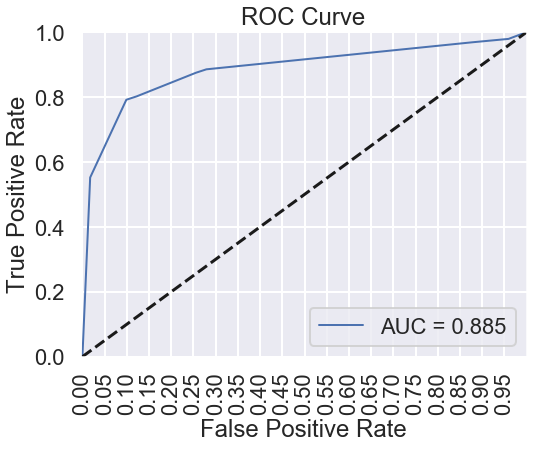

In [26]:
sns.set_context('poster')
auc_dt = roc_auc_score(ytest, dt_pred_prb)
fpr, tpr, threshold = roc_curve(ytest, dt_pred_prb)
plot_roc_curve(fpr, tpr, label='AUC = %0.3f' % auc_dt)

## Plotting Decision Tree

In [27]:
#Loading packages
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

### For Windows

Download Graphviz 2.38 from this [link](https://www.softpedia.com/get/Others/Miscellaneous/Graphviz.shtml) and install. Then run below line as per your intallation path. (This step is one time)

In [35]:
import os
os.environ["Path"] += os.pathsep + r'C:\Users\Fahad\Desktop\DS Projects\6 - Titanic Advanced Classification\Graphviz2.38\bin'

### For Ubuntu

In [36]:
# ! sudo apt install graphviz

### For MAC

In [37]:
# ! brew install graphviz

In [38]:
dot_data = StringIO()

In [39]:
export_graphviz(clf_dt, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=list(X.columns))

In [40]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

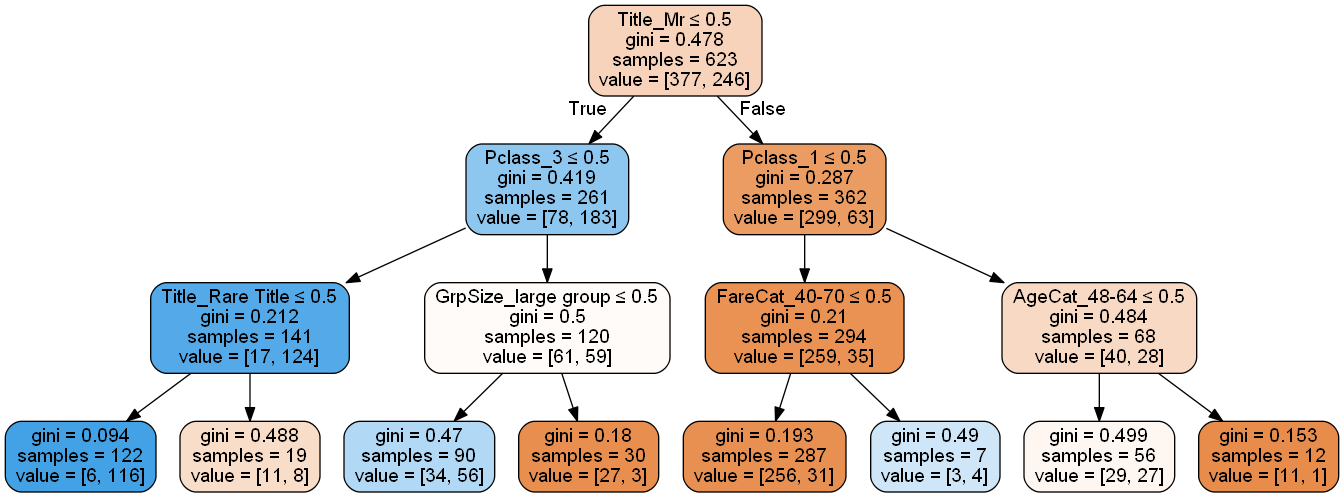

In [41]:
Image(graph.create_png())

**Exporting PNG file of Decision Trees**

In [42]:
graph.write_png('Decision Tree_Titanic.png')

True

## Features Importance

In [43]:
clf_dt.feature_importances_

array([0.        , 0.        , 0.06720923, 0.        , 0.13844724,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.59849287, 0.        , 0.06553138,
       0.        , 0.        , 0.08715219, 0.        , 0.        ,
       0.        , 0.        , 0.02084285, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02232423, 0.        ])

In [44]:
features_tuple = list(zip(X.columns, clf_dt.feature_importances_))

In [45]:
features_tuple

[('SibSp', 0.0),
 ('Parch', 0.0),
 ('Pclass_1', 0.06720923019824247),
 ('Pclass_2', 0.0),
 ('Pclass_3', 0.13844724222638327),
 ('Sex_female', 0.0),
 ('Sex_male', 0.0),
 ('Embarked_C', 0.0),
 ('Embarked_Q', 0.0),
 ('Embarked_S', 0.0),
 ('Title_Master', 0.0),
 ('Title_Miss', 0.0),
 ('Title_Mr', 0.5984928741149036),
 ('Title_Mrs', 0.0),
 ('Title_Rare Title', 0.06553137630060007),
 ('GrpSize_couple', 0.0),
 ('GrpSize_group', 0.0),
 ('GrpSize_large group', 0.08715219205067479),
 ('GrpSize_solo', 0.0),
 ('FareCat_0-10', 0.0),
 ('FareCat_100+', 0.0),
 ('FareCat_25-40', 0.0),
 ('FareCat_40-70', 0.02084285439629028),
 ('FareCat_70-100', 0.0),
 ('FareCat_Oct-25', 0.0),
 ('AgeCat_0-16', 0.0),
 ('AgeCat_16-32', 0.0),
 ('AgeCat_32-48', 0.0),
 ('AgeCat_48-64', 0.02232423071290549),
 ('AgeCat_64+', 0.0)]

In [46]:
feature_imp = pd.DataFrame(features_tuple, columns=[
                           "Feature Names", "Importance"])

In [47]:
feature_imp = feature_imp.sort_values("Importance", ascending=False)

Text(0.5, 1.0, 'Decision Classifier - Features Importance')

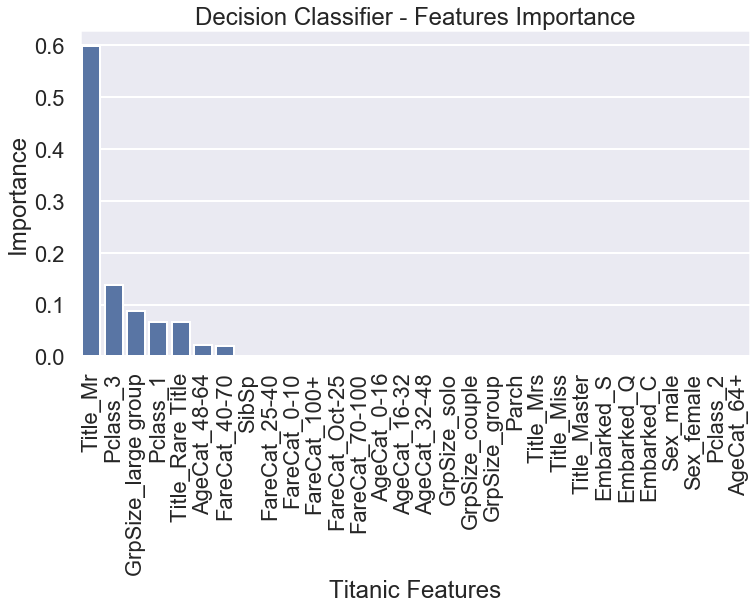

In [48]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Feature Names", y="Importance", data=feature_imp, color='b')
plt.xlabel("Titanic Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("Decision Classifier - Features Importance")

### Note: We can also use **Select K Best** Algorithm to check which features are important.

# Random Forest

### Defining Random Forest classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
clf_rf = RandomForestClassifier(random_state=100)

In [51]:
clf_rf.fit(xtrain, ytrain)

RandomForestClassifier(random_state=100)

In [52]:
rf_pred = clf_rf.predict(xtest)
rf_pred_prb = clf_rf.predict_proba(xtest)[:, 1]

### Find Precision for Random Forest

In [53]:
precision_rf = precision_score(ytest, rf_pred)
print("Precision: {}".format(precision_rf))

Precision: 0.7029702970297029


### Find Accuracy for Random Forest

In [54]:
accuracy_rf = accuracy_score(ytest, rf_pred)
print("Accuracy: {}".format(accuracy_rf))

Accuracy: 0.7947761194029851


### Find Recall for Random Forest

In [55]:
recall_rf = recall_score(ytest, rf_pred)
print("Recall: {}".format(recall_rf))

Recall: 0.7395833333333334


### Find F1 Score for Random Forest

In [56]:
rf_f1 = recall_score(ytest, rf_pred)
print("F1 Score: {}".format(rf_f1))

F1 Score: 0.7395833333333334


### Print Classification Report for Random Forest

In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(ytest,rf_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       172
           1       0.70      0.74      0.72        96

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.80      0.79      0.80       268



### ROC Curve for Random Forest

In [59]:
from sklearn.metrics import auc, roc_curve, roc_auc_score

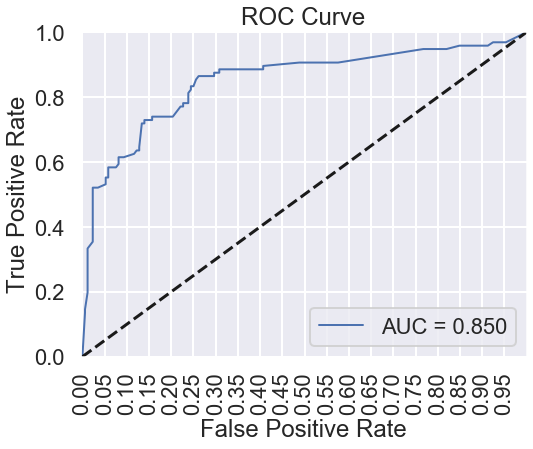

In [60]:
auc_rf = roc_auc_score(ytest, rf_pred_prb)
fpr, tpr, threshold = roc_curve(ytest, rf_pred_prb)
plot_roc_curve(fpr, tpr, label='AUC = %0.3f' % auc_rf)

### Features Importance

In [61]:
features_tuple = list(zip(X.columns, clf_rf.feature_importances_))

In [62]:
feature_imp = pd.DataFrame(features_tuple, columns=[
                           "Feature Names", "Importance"])

In [63]:
feature_imp = feature_imp.sort_values("Importance", ascending=False)

Text(0.5, 1.0, 'Random Forest Classifier - Features Importance')

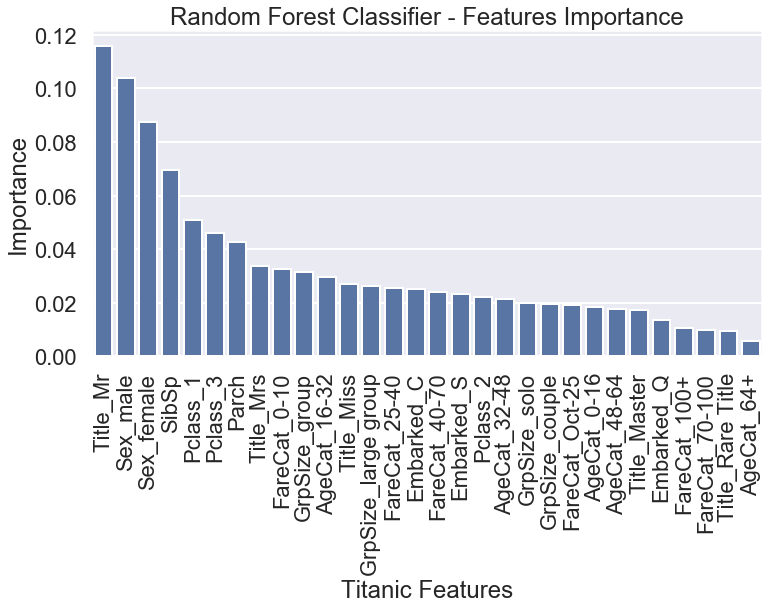

In [64]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Feature Names", y="Importance", data=feature_imp, color='b')
plt.xlabel("Titanic Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("Random Forest Classifier - Features Importance")

## Hyperparameter Tuning using GridSearchCV

In [65]:
#Importing GridSearchCV
from sklearn.model_selection import GridSearchCV

In [66]:
#Making grid of parameters and running GridSearch CV
param_grid1 = {"n_estimators": [9, 18, 27, 36, 45, 54, 63],
               "max_depth": [1, 5, 10, 15, 20, 25, 30],
               "min_samples_leaf": [1, 2, 4, 6, 8, 10]}

RF = RandomForestClassifier(random_state=100)
# Instantiate the GridSearchCV object: logreg_cv
RF_cv1 = GridSearchCV(RF, param_grid1, cv=5, scoring='accuracy', n_jobs=4)

# Fit it to the data
RF_cv1.fit(xtrain, ytrain)

# RF_cv1.cv_results_,
RF_cv1.best_params_, RF_cv1.best_score_

({'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 54},
 0.8218709677419355)

**So we found **'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 54** as optimum parameters

**Let's try new set of parameter values near to optimum.**

In [67]:
param_grid2 = {"n_estimators": [51, 52, 53, 54, 55, 56, 57],
               "max_depth": [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
               "min_samples_leaf": [1, 2, 3, 4, 5]}

RF = RandomForestClassifier(random_state=100)
# Instantiate the GridSearchCV object: logreg_cv
RF_cv2 = GridSearchCV(RF, param_grid2, cv=5, scoring='accuracy', n_jobs=4)

# Fit it to the data
RF_cv2.fit(xtrain, ytrain)

# RF_cv2.grid_scores_,
RF_cv2.best_params_, RF_cv2.best_score_

({'max_depth': 16, 'min_samples_leaf': 2, 'n_estimators': 53},
 0.8218709677419355)

 So we found **'max_depth': 16, 'min_samples_leaf': 2, 'n_estimators': 53** as optimum parameters

### Tuned Random Forest

In [68]:
RF_grid = RF_cv2.best_estimator_

In [69]:
RF_grid.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=16, min_samples_leaf=2, n_estimators=53,
                       random_state=100)

In [70]:
rf_pred_t = RF_grid.predict(xtest)
rf_pred_prb_t = RF_grid.predict_proba(xtest)[:, 1]

### Accuracy for Tuned Random Forest

In [71]:
accuracy_rf_t = accuracy_score(ytest, rf_pred_t)
print("Accuracy after tuning: {}".format(accuracy_rf_t))

Accuracy after tuning: 0.832089552238806


### Recall for Tuned Random Forest

In [72]:
recall_rf_t = recall_score(ytest, rf_pred_t)
recall_rf_t

0.7916666666666666

### Precision for Tuned Random Forest

In [73]:
precision_rf_t = precision_score(ytest, rf_pred_t)
precision_rf_t

0.7524752475247525

### F1 Score for Tuned Random Forest

In [74]:
rf_t_f1 = f1_score(ytest, rf_pred_t)
rf_t_f1

0.7715736040609136

### Classification Report for Tuned Random Forest

In [75]:
print(classification_report(ytest,rf_pred_t))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       172
           1       0.75      0.79      0.77        96

    accuracy                           0.83       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268



### ROC Curve for Tuned Random Forest

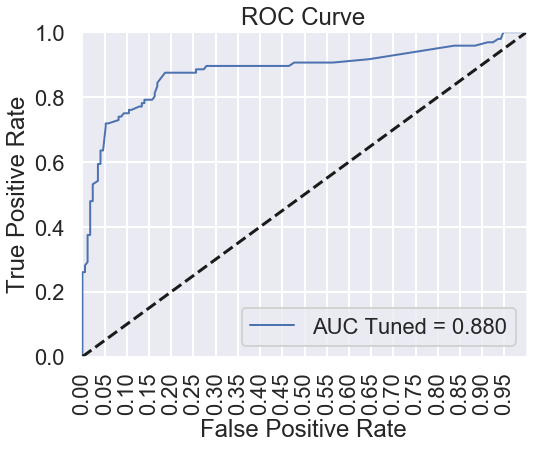

In [76]:
auc_rf_t = roc_auc_score(ytest, rf_pred_prb_t)
fpr, tpr, threshold = roc_curve(ytest, rf_pred_prb_t)
plot_roc_curve(fpr, tpr, label='AUC Tuned = %0.3f' % auc_rf_t)

### Hyperparameters Tuning Using Randomized Search

In [77]:
from sklearn.model_selection import RandomizedSearchCV

In [78]:
rf_rs = RandomForestClassifier(random_state=100)

In [79]:
for x in np.linspace(start=10, stop=1000, num=10):
    print(x)

10.0
120.0
230.0
340.0
450.0
560.0
670.0
780.0
890.0
1000.0


In [80]:
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=10, stop=1000, num=10)]

#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)

#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

In [81]:
random_grid1 = {"n_estimators": n_estimators,
                "max_depth": max_depth,
                "min_samples_split": min_samples_split}

In [82]:
rf_random = RandomizedSearchCV(
    estimator=rf_rs, param_distributions=random_grid1, n_iter=50, cv=5, verbose=2, random_state=100)
#Fit the random search model
rf_random.fit(xtrain, ytrain)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=80, min_samples_split=10, n_estimators=450; total time=   1.4s
[CV] END max_depth=80, min_samples_split=10, n_estimators=450; total time=   1.4s
[CV] END max_depth=80, min_samples_split=10, n_estimators=450; total time=   1.6s
[CV] END max_depth=80, min_samples_split=10, n_estimators=450; total time=   1.4s
[CV] END max_depth=80, min_samples_split=10, n_estimators=450; total time=   1.4s
[CV] END max_depth=30, min_samples_split=5, n_estimators=560; total time=   1.8s
[CV] END max_depth=30, min_samples_split=5, n_estimators=560; total time=   1.7s
[CV] END max_depth=30, min_samples_split=5, n_estimators=560; total time=   1.8s
[CV] END max_depth=30, min_samples_split=5, n_estimators=560; total time=   1.8s
[CV] END max_depth=30, min_samples_split=5, n_estimators=560; total time=   1.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=1000; total time=   3.2s
[CV] END max_depth=None, min_samples_sp

[CV] END max_depth=20, min_samples_split=10, n_estimators=670; total time=   2.1s
[CV] END max_depth=20, min_samples_split=10, n_estimators=670; total time=   2.1s
[CV] END max_depth=20, min_samples_split=10, n_estimators=670; total time=   2.1s
[CV] END max_depth=20, min_samples_split=10, n_estimators=670; total time=   2.1s
[CV] END max_depth=20, min_samples_split=10, n_estimators=670; total time=   2.1s
[CV] END max_depth=60, min_samples_split=5, n_estimators=340; total time=   1.0s
[CV] END max_depth=60, min_samples_split=5, n_estimators=340; total time=   1.0s
[CV] END max_depth=60, min_samples_split=5, n_estimators=340; total time=   1.1s
[CV] END max_depth=60, min_samples_split=5, n_estimators=340; total time=   1.0s
[CV] END max_depth=60, min_samples_split=5, n_estimators=340; total time=   1.0s
[CV] END max_depth=60, min_samples_split=5, n_estimators=120; total time=   0.3s
[CV] END max_depth=60, min_samples_split=5, n_estimators=120; total time=   0.3s
[CV] END max_depth=60, 

[CV] END max_depth=30, min_samples_split=2, n_estimators=450; total time=   1.4s
[CV] END max_depth=30, min_samples_split=2, n_estimators=450; total time=   1.4s
[CV] END max_depth=30, min_samples_split=2, n_estimators=450; total time=   1.4s
[CV] END max_depth=30, min_samples_split=2, n_estimators=450; total time=   1.4s
[CV] END max_depth=None, min_samples_split=5, n_estimators=560; total time=   1.8s
[CV] END max_depth=None, min_samples_split=5, n_estimators=560; total time=   1.9s
[CV] END max_depth=None, min_samples_split=5, n_estimators=560; total time=   1.8s
[CV] END max_depth=None, min_samples_split=5, n_estimators=560; total time=   1.8s
[CV] END max_depth=None, min_samples_split=5, n_estimators=560; total time=   1.8s
[CV] END max_depth=80, min_samples_split=5, n_estimators=1000; total time=   3.3s
[CV] END max_depth=80, min_samples_split=5, n_estimators=1000; total time=   3.8s
[CV] END max_depth=80, min_samples_split=5, n_estimators=1000; total time=   3.8s
[CV] END max_de

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
                   n_iter=50,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 120, 230, 340, 450,
                                                         560, 670, 780, 890,
                                                         1000]},
                   random_state=100, verbose=2)

In [83]:
#Selecting the best classifier
rf_random.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_split=10, n_estimators=10,
                       random_state=100)

In [84]:
clf_rf_rand = rf_random.best_estimator_

In [85]:
clf_rf_rand.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=30, min_samples_split=10, n_estimators=10,
                       random_state=100)

In [86]:
pred_rf_rand = clf_rf_rand.predict(xtest)

In [87]:
prb_rf_rand = clf_rf_rand.predict_proba(xtest)[:, 1]

### Accuracy of Tuned Random Forest through Randomized Search

In [88]:
accuracy_rf_r = accuracy_score(ytest,pred_rf_rand)
accuracy_rf_r

0.8395522388059702

### Precision of Tuned Random Forest through Randomized Search

In [89]:
precision_rf_r = precision_score(ytest,pred_rf_rand)
precision_rf_r

0.7523809523809524

### Recall of Tuned Random Forest through Randomized Search

In [90]:
recall_rf_r = recall_score(ytest,pred_rf_rand)
recall_rf_r

0.8229166666666666

### F1-Score of Tuned Random Forest through Randomized Search

In [91]:
f1_rf_r = f1_score(ytest,pred_rf_rand)
f1_rf_r

0.7860696517412935

### Classification Report of Tuned Random Forest through Randomized Search

In [92]:
print(classification_report(ytest,pred_rf_rand))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       172
           1       0.75      0.82      0.79        96

    accuracy                           0.84       268
   macro avg       0.82      0.84      0.83       268
weighted avg       0.84      0.84      0.84       268



### ROC Curve

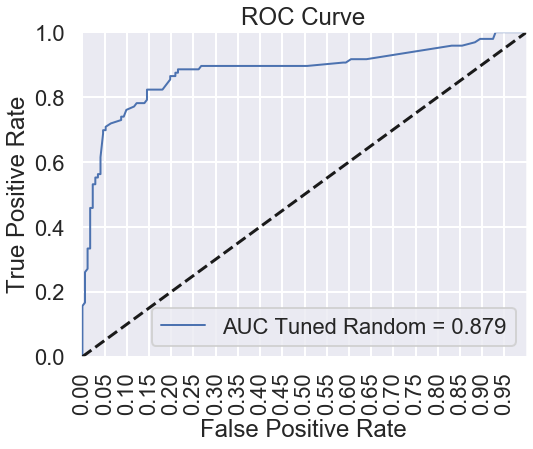

In [93]:
auc_rf_r = roc_auc_score(ytest, prb_rf_rand)
fpr, tpr, threshold = roc_curve(ytest, prb_rf_rand)
plot_roc_curve(fpr, tpr, label='AUC Tuned Random = %0.3f' % auc_rf_r)

# Ada Boost

In [94]:
from sklearn.ensemble import AdaBoostClassifier

In [95]:
clf_adb = AdaBoostClassifier(random_state=100)
clf_adb.fit(xtrain, ytrain)

AdaBoostClassifier(random_state=100)

In [96]:
pred_clf_adb = clf_adb.predict(xtest)

In [97]:
adb_pred_prb = clf_adb.predict_proba(xtest)[:, 1]

### Accuracy for Ada Boost

In [98]:
accuracy_adb = accuracy_score(ytest, pred_clf_adb)
accuracy_adb

0.8283582089552238

### Precision for Ada Boost

In [99]:
precision_adb = precision_score(ytest, pred_clf_adb)
precision_adb

0.7272727272727273

### Recall for Ada Boost

In [100]:
recall_adb = recall_score(ytest, pred_clf_adb)
recall_adb

0.8333333333333334

### F1 Score for Ada Boost

In [101]:
f1_adb = f1_score(ytest, pred_clf_adb)
f1_adb

0.7766990291262137

### Classification Report for Ada Boost

In [102]:
print(classification_report(ytest,pred_clf_adb))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       172
           1       0.73      0.83      0.78        96

    accuracy                           0.83       268
   macro avg       0.81      0.83      0.82       268
weighted avg       0.84      0.83      0.83       268



### ROC Curve

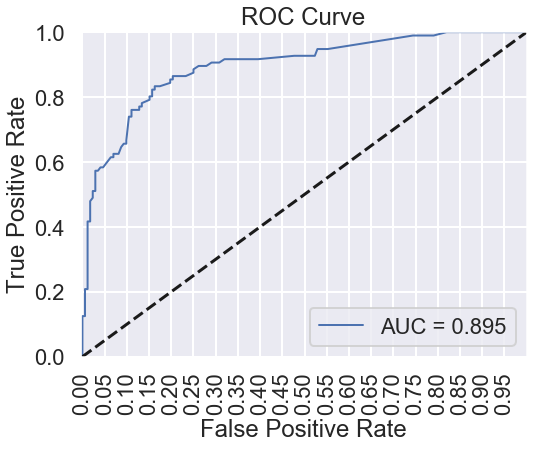

In [103]:
auc_adb = roc_auc_score(ytest, adb_pred_prb)
fpr, tpr, threshold = roc_curve(ytest, adb_pred_prb)
plot_roc_curve(fpr, tpr, label='AUC = %0.3f' % auc_adb)

# XGBoost

## Extreme Gradient Boosting Algorithm

In [104]:
#!pip install xgboost

In [105]:
import xgboost as xgb

In [106]:
clf_xgb = xgb.XGBClassifier(seed=25,nthread=1,random_state=100)

In [107]:
clf_xgb.fit(xtrain, ytrain)

C:\Users\Fahad\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:25:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
              random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=25, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [108]:
xgb_pred = clf_xgb.predict(xtest)
xgb_pred_prb=clf_xgb.predict_proba(xtest)[:,1]

### Accuracy of XGBoost

In [109]:
accuracy_xgb = accuracy_score(ytest, xgb_pred)
print("Accuracy: {}".format(accuracy_xgb))

Accuracy: 0.7985074626865671


### Recall of XGBoost

In [110]:
recall_xgb = recall_score(ytest, xgb_pred)
recall_xgb

0.7395833333333334

###  Precision of XGBoost

In [111]:
precision_xgb = precision_score(ytest, xgb_pred)
precision_xgb

0.71

### F1 Score of XGB

In [112]:
xgb_f1=f1_score(ytest, xgb_pred)
xgb_f1

0.7244897959183674

### Classification Report of XGBoost

In [113]:
print(classification_report(ytest,xgb_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       172
           1       0.71      0.74      0.72        96

    accuracy                           0.80       268
   macro avg       0.78      0.79      0.78       268
weighted avg       0.80      0.80      0.80       268



### ROC Curve

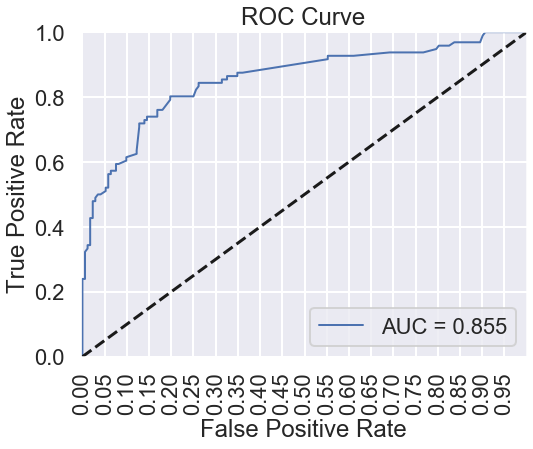

In [114]:
auc_xgb=roc_auc_score(ytest,xgb_pred_prb)
fpr,tpr,threshold=roc_curve(ytest,xgb_pred_prb)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_xgb)

# Comparison

In [115]:
comparison_dict={"Algorithm":["Decision Tree","Random Forest","Tuned Random Forest(Grid)","Tuned Random Forest(Random)","XGBoost","Ada Boost"],
                 "Accuracy":[accuracy_dt,accuracy_rf,accuracy_rf_t,accuracy_rf_r,accuracy_xgb,accuracy_adb],
                 "Precision":[precision_dt,precision_rf,precision_rf_t,precision_rf_r,precision_xgb,precision_adb],
                 "Recall":[recall_dt,recall_rf,recall_rf_t,recall_rf_r,recall_xgb,recall_adb],
                 "AUC":[auc_dt,auc_rf,auc_rf_t,auc_rf_r,auc_xgb,auc_adb],
                 "F1 Score":[dt_f1,rf_f1,rf_t_f1,f1_rf_r,xgb_f1,f1_adb]
                }

In [116]:
comparison = pd.DataFrame(comparison_dict)
comparison.sort_values(['Recall', 'Accuracy', 'AUC'], ascending=False)

,Algorithm,Accuracy,Precision,Recall,AUC,F1 Score
5,Ada Boost,0.828358,0.727273,0.833333,0.895409,0.776699
3,Tuned Random Forest(Random),0.839552,0.752381,0.822917,0.879391,0.786070
0,Decision Tree,0.850746,0.785714,0.802083,0.885356,0.793814
2,Tuned Random Forest(Grid),0.832090,0.752475,0.791667,0.879663,0.771574
4,XGBoost,0.798507,0.710000,0.739583,0.855227,0.724490
1,Random Forest,0.794776,0.702970,0.739583,0.849685,0.739583


# Submission on Kaggle

In [117]:
#Import test data
test = pd.read_csv('competition_clean.csv')
df_test = test.copy()
df_test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Title,GrpSize,FareCat,AgeCat
0,892,3,male,0,0,Q,Mr,solo,0-10,32-48
1,893,3,female,1,0,S,Mrs,couple,0-10,32-48
2,894,2,male,0,0,Q,Mr,solo,0-10,48-64
3,895,3,male,0,0,S,Mr,solo,0-10,16-32
4,896,3,female,1,1,S,Mrs,group,10-25,16-32


In [118]:
#Do One Hot encoding of test data
df_OneHot = pd.get_dummies(df_test,columns=['Pclass','Sex','Embarked','Title','GrpSize','FareCat','AgeCat'])
df_test = df_OneHot.copy()
df_test.head()

,PassengerId,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,FareCat_10-25,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
0,892,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,893,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,894,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,895,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,896,1,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [119]:
#Separate Passenger ID for submission
PassengerID = df_test['PassengerId']
df_test.drop('PassengerId', axis=1, inplace=True)
df_test.head()

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,FareCat_10-25,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
0,0,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,1,1,0,0,1,1,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


### Predictions through final model

In [120]:
#Decision Tree
pred_final1 = clf_dt.predict(df_test)

In [121]:
#Random Forest
pred_final2 = clf_rf.predict(df_test)

In [122]:
#Random Forest grid search
pred_final3 = RF_grid.predict(df_test)

In [123]:
#Random Forest Randomized search
pred_final4 = clf_rf_rand.predict(df_test)

In [124]:
#AdaBoost
pred_final5 = clf_adb.predict(df_test)

#### Creating Data Frame for submission

In [125]:
#Decision Tree
submission1 = pd.DataFrame({'PassengerId': PassengerID, 'Survived': pred_final1})

In [126]:
#Random Forest
submission2 = pd.DataFrame({'PassengerId': PassengerID, 'Survived': pred_final2})

In [127]:
#Random Forest grid search
submission3 = pd.DataFrame({'PassengerId': PassengerID, 'Survived': pred_final3})

In [128]:
#Random Forest Randomized search
submission4 = pd.DataFrame({'PassengerId': PassengerID, 'Survived': pred_final4})

In [129]:
#AdaBoost
submission5 = pd.DataFrame({'PassengerId': PassengerID, 'Survived': pred_final5})

### Export the datasets into .csv files

In [130]:
#Decision Tree
submission1.to_csv('MySubmission_DecisionTree.csv', index=False)

In [131]:
#Random Forest
submission2.to_csv('MySubmission_RandomForest.csv', index=False)

In [132]:
#Random Forest grid search
submission3.to_csv('MySubmission_TunedRandomForest_gridsearch.csv', index=False)

In [133]:
#Random Forest Randomized search
submission4.to_csv('MySubmission_TunedRandomForest_randomsearch.csv', index=False)

In [134]:
#AdaBoost
submission5.to_csv('MySubmission_AdaBoost.csv', index=False)